In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sympy import *
import lmfit
from lmfit import Parameters, minimize
from lmfit.printfuncs import report_fit



In [34]:
def ratelessthan1(row):
        if row['rate'] < 1:
            return False
        else:
            return True

In [35]:
class DecayingSineModel(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel, self).__init__(decaying_sine, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params(b= 1.22, d= 3.33)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [36]:
class DecayingSineModel2021(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine2021(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel2021, self).__init__(decaying_sine2021, *args, **kwargs)

    def guess(self, data, **kwargs):
        #params = self.make_params(b= 1.22, d= 3.33)
        params = Parameters()
        params.add('b', value=1.1)
        params.add('d', value = 3.3, min= 80, max= 200)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [10]:
df = pd.read_csv("CrudeCounty2021.csv")

In [22]:
rural = ['Alpine', 'Amador', 'Calaveras', 'Colusa', 'Del Norte', 'El Dorado', 'Glenn Humboldt', 'Inyo', 'Kings', 'Lake', 'Lassen', 'Madera', 'Mariposa', 'Mendocino', 'Modoc', 'Nevada', 'Plumas', 'San Benito', 'Sierra', 'Sisikyou', 'Sutter', 'Tehama', 'Trinity', 'Tuolumne', 'Yuba']
suburban = ['Butte', 'Imperial', 'Kern', 'Marin', 'Merced','Monterey', 'Napa','Placer','San Luis Obispo', 'Santa Barbara', 'Santa Cruz', 'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Tulare', 'Yolo']
urban = ['Alameda', 'Contra Costa', 'Fresno', 'Los Angeles', 'Orange', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin','San Mateo','Santa Clara','Ventura']

In [23]:
def filter_urban(row):
    exist_urban = urban.count(row['county'])
    if exist_urban >0:
        return True
    else:
        return False
        

In [24]:
def filter_suburban(row):
    exist_urban = suburban.count(row['county'])
    if exist_urban >0:
        return True
    else:
        return False

In [31]:
def filter_rural(row):
    exist_urban = rural.count(row['county'])
    if exist_urban >0:
        return True
    else:
        return False

In [26]:
dfurban = df[df.apply(filter_urban,axis=1)]

In [27]:
dfurban

,county,rate,num1,num2,num3
2,San Francisco,48.7125,44.2050,53.5500,2.3550
11,Ventura,25.4675,22.1900,29.1000,1.7325
14,Orange,23.2875,21.6425,25.0200,0.8550
17,San Diego,20.4150,18.9200,22.0000,0.7775
19,Riverside,19.6425,17.9525,21.4500,0.8800
22,San Joaquin,17.6200,14.8125,20.8075,1.4950
29,San Bernardino,15.7150,14.1125,17.4525,0.8425
30,Contra Costa,15.4350,13.2725,17.8575,1.1450
31,Los Angeles,15.3200,14.5650,16.1025,0.3875
41,Alameda,11.2875,9.7450,13.0050,0.8150


In [28]:
dfsuburban = df[df.apply(filter_suburban,axis=1)]

In [29]:
dfsuburban

,county,rate,num1,num2,num3
6,Kern,29.3800,25.9875,33.1025,1.7850
8,Butte,27.7850,21.3925,35.5300,3.4825
10,Shasta,25.8900,19.2000,34.2575,3.6900
12,San Luis Obispo,25.0375,19.5875,31.5575,2.9550
13,Sonoma,24.8025,20.6075,29.6075,2.2400
20,Stanislaus,19.2700,15.8125,23.2550,1.8500
28,Marin,16.3300,11.8375,22.0100,2.4850
34,Santa Cruz,13.9200,9.8950,19.0675,2.2375
37,Santa Barbara,12.8975,9.8625,16.6075,1.6575
39,Solano,11.8925,8.9525,15.4975,1.6075


In [32]:
dfrural = df[df.apply(filter_rural,axis=1)]
dfrural

,county,rate,num1,num2,num3
0,Alpine,86.7300,23.6300,462.0200,43.3650
1,Mendocino,54.1750,39.8675,71.9750,7.8725
3,Lake,47.9075,32.7400,67.8125,8.5075
4,Trinity,40.8850,13.7425,95.0275,18.0450
7,Nevada,27.9825,18.6625,40.3800,5.2550
9,Inyo,27.4625,10.9825,62.4250,10.5175
15,Modoc,22.4350,6.1150,78.1300,11.2150
16,Sutter,20.7900,13.0925,31.5750,4.4250
18,Yuba,19.6625,11.2775,31.8950,4.9000
21,Del Norte,17.8725,6.0100,41.5350,7.8900


In [43]:
def getModel(rus):
    rus["New"]= int('0')
    rus.sort_values(by = ['rate'], ascending= [True])
    for county in rus:
        rus["New"] =  abs(rus.index - 58)+1
    rus2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        rus2 = rus2.append({"rate": key, "ccount":len(rus[rus['rate']<key])/60},ignore_index = True)
    print(rus2)
    if rus == dfurban:  
        model = DecayingSineModel2021()
        params = model.guess(rus2['ccount'], x=rus2['rate'])
        fit = model.fit(rus2['ccount'], params, x=rus2['rate'] )
    else:
        model = DecayingSineModel()
        params = model.guess(rus2['ccount'], x=rus2['rate'])
        fit = model.fit(rus2['ccount'], params, x=rus2['rate'] )
    model = DecayingSineModel()
    params = model.guess(rus2['ccount'], x=rus2['rate'])
    fit = model.fit(rus2['ccount'], params, x=rus2['rate'] )
    return fit, rus2

In [54]:
    dfurban["New"]= int('0')
    dfurban.sort_values(by = ['rate'], ascending= [True])
    for county in dfurban:
        dfurban["New"] =  abs(dfurban.index - 58)+1
    dfurban2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        dfurban2 = dfurban2.append({"rate": key, "ccount":len(dfurban[dfurban['rate']<key])/60},ignore_index = True)
    print(dfurban2) 
    model = DecayingSineModel2021()
    params = model.guess(dfurban2['ccount'], x=dfurban2['rate'])
    fiturban = model.fit(dfurban2['ccount'], params, x=dfurban2['rate'] )

    rate    ccount
0    0.0  0.000000
1    1.0  0.000000
2    2.0  0.000000
3    3.0  0.000000
4    4.0  0.000000
..   ...       ...
95  95.0  0.233333
96  96.0  0.233333
97  97.0  0.233333
98  98.0  0.233333
99  99.0  0.233333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/3757645052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfurban["New"]= int('0')
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/3757645052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfurban["New"] =  abs(dfurban.index - 58)+1
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/3757645052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [55]:
fiturban

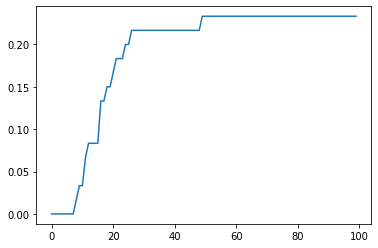

In [56]:
x = dfurban2['rate']
y= dfurban2['ccount']
plt.plot(x,y)

In [61]:
bvalurban= fiturban.params["b"].value
dvalurban= fiturban.params["d"].value

In [65]:
bvalurban,dvalurban

(0.7779011183361338, 82.74214367556138)

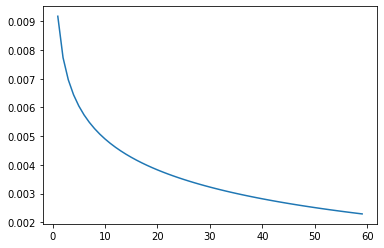

In [58]:
density_x=[]
rate_y=[]

for x in range(60):
    b = bvalurban
    d = dvalurban
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

In [93]:
    dfsuburban["New"]= int('0')
    dfsuburban.sort_values(by = ['rate'], ascending= [True])
    for county in dfsuburban:
        dfsuburban["New"] =  abs(dfsuburban.index - 58)+1
    dfsuburban2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        dfsuburban2 = dfsuburban2.append({"rate": key, "ccount":len(dfsuburban[dfsuburban['rate']<key])/60},ignore_index = True)
    print(dfsuburban2) 
    model = DecayingSineModel2021()
    params = model.guess(dfsuburban2['ccount'], x=dfsuburban2['rate'])
    fitsuburban = model.fit(dfsuburban2['ccount'], params, x=dfsuburban2['rate'] )

    rate    ccount
0    0.0  0.000000
1    1.0  0.000000
2    2.0  0.000000
3    3.0  0.016667
4    4.0  0.016667
..   ...       ...
95  95.0  0.283333
96  96.0  0.283333
97  97.0  0.283333
98  98.0  0.283333
99  99.0  0.283333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/1600294437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsuburban["New"]= int('0')
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/1600294437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsuburban["New"] =  abs(dfsuburban.index - 58)+1
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/1600294437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [67]:
bvalsuburban= fitsuburban.params["b"].value
dvalsuburban= fitsuburban.params["d"].value

In [68]:
bvalsuburban, dvalsuburban

(0.8385143915407711, 84.73322928469632)

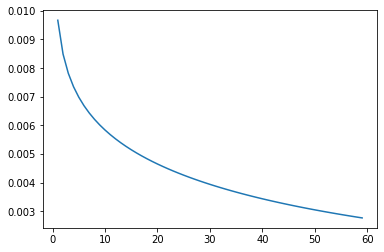

In [69]:
density_x=[]
rate_y=[]

for x in range(60):
    b = bvalsuburban
    d = dvalsuburban
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

In [71]:
bvalrural= fitrural.params["b"].value
dvalrural= fitrural.params["d"].value

In [91]:
    dfrural["New"]= int('0')
    dfrural.sort_values(by = ['rate'], ascending= [True])
    for county in dfrural:
        dfrural["New"] =  abs(dfrural.index - 58)+1
    dfrural2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        dfrural2 = dfrural2.append({"rate": key, "ccount":len(dfrural[dfrural['rate']<key])/60},ignore_index = True)
    print(dfrural2) 
    model = DecayingSineModel2021()
    params = model.guess(dfrural2['ccount'], x=dfrural2['rate'])
    fitrural = model.fit(dfrural2['ccount'], params, x=dfrural2['rate'] )

    rate    ccount
0    0.0  0.000000
1    1.0  0.033333
2    2.0  0.033333
3    3.0  0.033333
4    4.0  0.033333
..   ...       ...
95  95.0  0.383333
96  96.0  0.383333
97  97.0  0.383333
98  98.0  0.383333
99  99.0  0.383333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/2337992874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrural["New"]= int('0')
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/2337992874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrural["New"] =  abs(dfrural.index - 58)+1
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_35310/2337992874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [72]:
bvalrural, dvalrural

(0.948545815542121, 100.88317143478697)

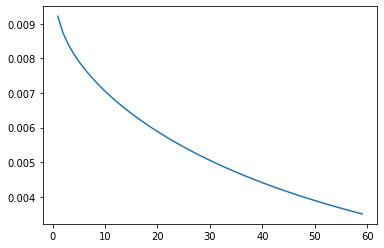

In [73]:
density_x=[]
rate_y=[]

for x in range(60):
    b = bvalrural
    d = dvalrural
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

In [81]:
bvalall = []
dvalall = []
bvalall.append(bvalrural)
bvalall.append(bvalsuburban)
bvalall.append(bvalurban)
dvalall.append(dvalrural)
dvalall.append(dvalsuburban)
dvalall.append(dvalurban)

In [82]:
bvalall, dvalall

([0.948545815542121, 0.8385143915407711, 0.7779011183361338],
 [100.88317143478697, 84.73322928469632, 82.74214367556138])

In [83]:
def prime3(x,b,d):
    q = pow(x,b)
    return (d*b*pow(x,b-1))/(pow((q+d),2))


In [84]:
plt.rcParams["figure.figsize"] = (20,10)

0
1
2


Text(0.5, 1.0, 'Density Curve: Any Opioid overdose Rates in 2021 based on whether the county is rural, suburban, or urban')

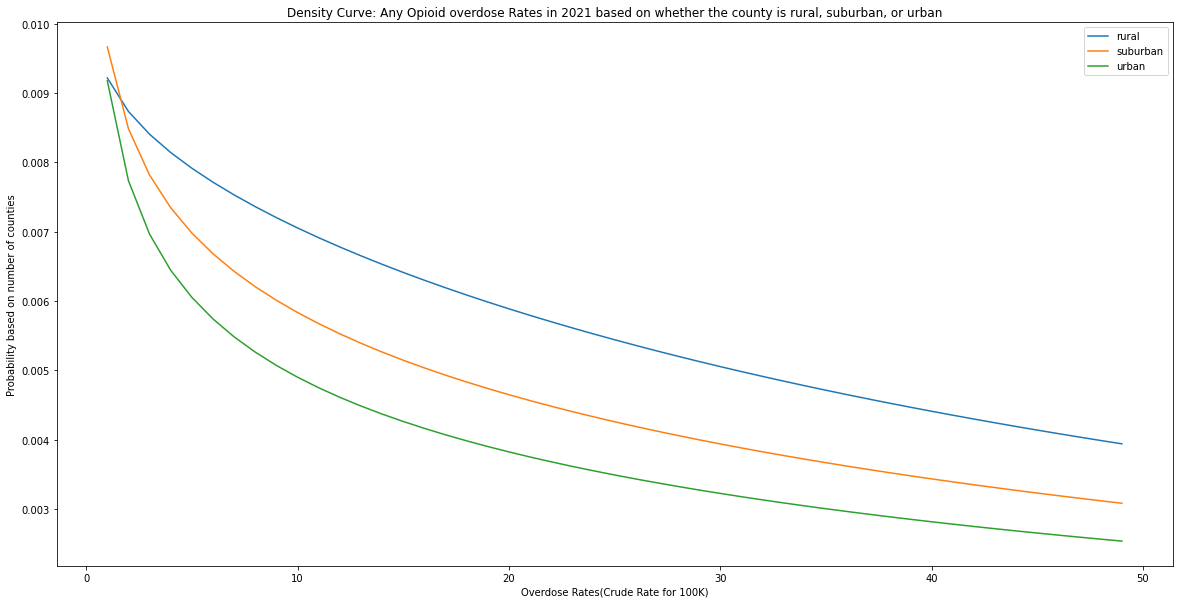

In [94]:
places= [rural,suburban,urban]
for m in range(len(bvalall)):
    print(m)
    x = []
    y= []
    b = bvalall[m]
    d = dvalall[m]
    for i in range(50):
        x.append(i)
        y.append(prime3(x[i],b,d))
    plt.plot(x,y,label= str(places[m]))
plt.legend(title='Type of Location')
plt.legend(['rural', 'suburban', 'urban'])
plt.xlabel("Overdose Rates(Crude Rate for 100K)")
plt.ylabel("Probability based on number of counties")
plt.title("Density Curve: Any Opioid overdose Rates in 2021 based on whether the county is rural, suburban, or urban")